In [1]:
import nltk
import string
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

%matplotlib inline

## Загрзука данных

Данные представлены в файле форматом `.txt`. Каждый из текстов разделен на категории:

* __label__NORMAL - нейтральный комментарий
* __label__INSULT - комментарии, которые унижают человека
* __label__THREAT - комментарии с явным намерением навредить другому человеку
* __label__OBSCENITY - комментарии, содержащие описание или угрозу сексуального насилия

In [2]:
data_list = []

with open('./dataset.txt', 'r', encoding='utf-8') as db:
    for line in db:
        labels = line.split()[0]
        text = line[len(labels)+1:].strip()
        labels = labels.split(',')[0]
        type_txt = 0
        if labels == '__label__NORMAL': 
            type_txt = 0
        else:
            type_txt = 1
        
        data_list.append((text, type_txt))

In [3]:
df = pd.DataFrame(data_list, columns=["text", "type"])
df.head()

,text,type
0,скотина! что сказать,1
1,я сегодня проезжала по рабочей и между домами ...,0
2,очередной лохотрон. зачем придумывать очередно...,0
3,"ретро дежавю ... сложно понять чужое сердце , ...",0
4,а когда мы статус агрогородка получили?,0


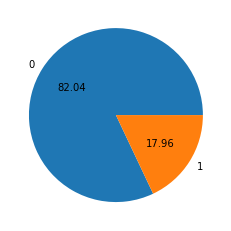

In [4]:
plt.pie(df.type.value_counts(), labels=[0,1], autopct="%.2f")
None

In [5]:
sample_size = min(df[df['type'] == 0].shape[0], df[df['type'] == 1].shape[0])
raw_data = np.concatenate((df[df['type'] == 0].values[:sample_size],
                           df[df['type'] == 1].values[:sample_size]), axis=0)

In [6]:
df = pd.DataFrame(raw_data, columns=["text", "type"])
df.head()

,text,type
0,я сегодня проезжала по рабочей и между домами ...,0
1,очередной лохотрон. зачем придумывать очередно...,0
2,"ретро дежавю ... сложно понять чужое сердце , ...",0
3,а когда мы статус агрогородка получили?,0
4,2 августа поздно вечером нашли вот такую потер...,0


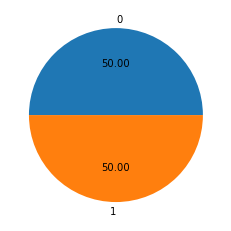

In [7]:
plt.pie(df.type.value_counts(), labels=[0,1], autopct="%.2f")
None

In [8]:
df.type.shape

(89210,)

In [9]:
print('Sum dublicated text:', df.duplicated().sum())

Sum dublicated text: 2


In [10]:
df = df.drop_duplicates()

In [11]:
print('Number of duplicate comments: ', df['text'].duplicated().sum())

Number of duplicate comments:  0


## Tokenize text

In [12]:
import re
import pymorphy2

In [13]:
def text_tokenizer(text: str):
    morph = pymorphy2.MorphAnalyzer(lang='ru')
    
    text = text.lower().replace("ё", "е")
    text = re.sub('((www\.[^\s]+)|(https?://[^\s]+))', '', text)
    text = re.sub('@[^\s]+', '', text)
    text = re.sub('[^a-zA-Zа-яА-Я1-9]+', ' ', text)
    text = re.sub(' +', ' ', text)
    
    tokenize = [token for token in nltk.word_tokenize(text)]
    print("Tokenize: ", tokenize)
    remove_stopW = [clear_txt for clear_txt in tokenize if clear_txt not in nltk.corpus.stopwords.words('russian')]
    print()
    print("Remove stop words: ", remove_stopW)
    print()
    morph_text = [morph.parse(m_text)[0].normal_form for m_text in remove_stopW]
    
    return morph_text

In [14]:
' '.join(text_tokenizer(df['text'][0]))

Tokenize:  ['я', 'сегодня', 'проезжала', 'по', 'рабочей', 'и', 'между', 'домами', 'снитенко', 'и', 'гомолысовой', 'магазином', 'на', 'пустыре', 'бежала', 'кошка', 'похожего', 'окраса', 'может', 'я', 'и', 'ошиблась', 'но', 'необычный', 'окрас', 'бросился', 'в', 'глаза']

Remove stop words:  ['сегодня', 'проезжала', 'рабочей', 'домами', 'снитенко', 'гомолысовой', 'магазином', 'пустыре', 'бежала', 'кошка', 'похожего', 'окраса', 'ошиблась', 'необычный', 'окрас', 'бросился', 'глаза']



'сегодня проезжать рабочий дом снитенко гомолысов магазин пустырь бежать кошка похожий окрас ошибиться необычный окрас броситься глаз'

In [15]:
print()

print(text_tokenizer('Машинист поезда А123! Говорит Дежурный по станции Комсомольск-1'))


Tokenize:  ['машинист', 'поезда', 'а123', 'говорит', 'дежурный', 'по', 'станции', 'комсомольск', '1']

Remove stop words:  ['машинист', 'поезда', 'а123', 'говорит', 'дежурный', 'станции', 'комсомольск', '1']

['машинист', 'поезд', 'а123', 'говорить', 'дежурный', 'станция', 'комсомольск', '1']


In [ ]:
normal_text = df['text'].apply(text_tokenizer)

In [16]:
tf = TfidfVectorizer(tokenizer=text_tokenizer).fit_transform(['Машинист поезда А123! Говорит Дежурный по станции Комсомольск-1'])

Tokenize:  ['машинист', 'поезда', 'а123', 'говорит', 'дежурный', 'по', 'станции', 'комсомольск', '1']

Remove stop words:  ['машинист', 'поезда', 'а123', 'говорит', 'дежурный', 'станции', 'комсомольск', '1']



In [17]:
tf.toarray()

array([[0.35355339, 0.35355339, 0.35355339, 0.35355339, 0.35355339,
        0.35355339, 0.35355339, 0.35355339]])